# Deep Learning - Assignment 1




## Outline (<span style="color:red">15 points</span>)
#### About the laboratory exercises
The laboratory exercises in computer room are for providing an environment doing the assignments and project，except the first exercise that will also contain a pytorch tutorial, explaining how to install python, pytorch on your own computer, or how to use them in the computer room. 

Extra information about access to pytorch environment can be found in the FAQ section in [https://moodle.oulu.fi/mod/page/view.php?id=73734](https://moodle.oulu.fi/mod/page/view.php?id=73734).

We will give at least 2 weeks for each assignment and more for the final project. So it happens that the new assignment is published while the deadline of the previous assignment is not reached. Good luck. 

#### In this assignment, you will learn:
* How to generate random data using python.
* Building linear models for simple regression problem on the generated data.
* Training the linear models with gradient descent algorithm.
* How to alleviate over-fitting for your model.
* **Concepts** you will learn: ***Regularization***, ***Model selection***, ***Gradient descent***, ***Over-fitting***, ***Weight decay***, ***Training/Validation/Testing***.

#### Tasks
In this assignment, we are going to solve a basic linear regression problem by fitting a polynomial function, which we shall use as a running example to motivate a number of key concepts mentioned above. 
* **Part 1.** Generate training and testing data using python.
* **Part 2.** Linear regression with polynomials without regularization. 
* **Part 3.** Linear regression with polynomials with regularization.

#### Environment
Python 3.<br>
Other libraries should be installed correctly such as numpy, matplotlib, *etc*., according to the dependencies of the assignment. 

#### Database
* Randomly synthesized data.

## Part 1. Generate training and testing data using python
Suppose we observe a real-valued input variable $x$ and we wish to use this observation to predict the value of a real-valued target variable $y$. For the present purposes, it is instructive to consider an artificial example using synthetically generated data because we then know the precise process that generated the data for comparison against any learned model.

We therefore generate our training data which consists of 10 pairs of $\{x_i, y_i\}$ where $\{x_i\}$ are generated uniformly in range (0, 1), and the corresponding targ
et values $\{y_i\}$ are obtained by first computing the corresponding values of the function $sin(2\pi x)$ and then adding random noise with a Gaussian distribution having standard deviation 0.3.
\begin{align*}
y_i = sin(2\pi x_i) + \varepsilon, \varepsilon\sim \mathcal{N}(0,\,0.3^{2}).
\end{align*}

The testing data is created in the same way as the creation of training data but the number of pairs is 100, thus to give a more complete evaluation of the model to be trained. 

Please create the required training and testing data below and plot them. You could use numpy to create the data and matplotlib.pyplot to show them. 

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 

x_train = np.random.rand(10, 1)
y_train = np.sin(2 * np.pi * x_train) + np.random.normal(0, 0.3, (10, 1))

# your code here
x_test = np.random.rand(100, 1)
y_test = np.sin(2 * np.pi * x_test) + np.random.normal(0, 0.3, (100, 1))

plt.plot(x_train, y_train, marker='o', linestyle='none') 
plt.plot(x_test, y_test, fillstyle='none', marker='o', color='g', linestyle='none') 
plt.show()

<Figure size 640x480 with 1 Axes>

--------------------<span style="color:red">1 point</span>--------------------

## Part 2. Linear regression with polynomials without regularization
Congratulations if you generate the data correctly! However, to make sure all of you use the same data, we have generated it in advance. 

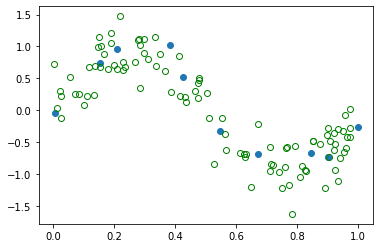

In [2]:
import pickle
with open('data/rawdata.pickle', 'rb') as f:
    data = pickle.load(f)
    
x_train = data['x_train']
y_train = data['y_train']

x_test = data['x_test']
y_test = data['y_test']
plt.plot(x_train, y_train, marker='o', linestyle='none') 
plt.plot(x_test, y_test, fillstyle='none', marker='o', color='g', linestyle='none') 
plt.show()

The task in this part is to train a linear model to fit the curve on the training data. Now that we have $\{x, y\}$, we consider using a polynomial function of the form 
\begin{align}
f(x, \pmb{w}) = \omega_0 + \omega_1x + \omega_2x^2 + ... + \omega_Mx^M = \sum_{j=0}^{M}\omega_jx^j,
\tag{1}
\end{align}
where $M$ is the *order* of the polynomial, and $x^j$ denotes $x$ raised to the power of j. The values of the coefficients will be determined by fitting the polynomial to the training data. To do so, we introduce the error function to be minimized:
\begin{equation}
E(\pmb{w}) = \frac{1}{2}\sum_{i=1}^{N}\{f(x_i, \pmb{w}) - y_i\}^2,
\tag{2}
\end{equation}
where, $N$ is 10 in our case.

First of all, to use matrix operation in this case, we re-write the polynomial function (1) in the form of matrix multiplication:
$$
\begin{bmatrix} 
f(x_1, \pmb{w}) \\ f(x_2, \pmb{w}) \\ . \\ . \\ . \\ f(x_N, \pmb{w})
\end{bmatrix} 
=
\begin{bmatrix} 
1 & x_1 & x_1^2 & . & . & . & x_1^M \\ 1 & x_2 & x_2^2 & . & . & . & x_2^M \\ . & . & . & . & . & . & . \\ . & . & . & . & . & . & . \\ . & . & . & . & . & . & . \\ 1 & x_N & x_N^2 & . & . & . & x_N^M
\end{bmatrix} 
\begin{bmatrix} 
\omega_0 \\ \omega_1 \\ . \\ . \\ . \\ \omega_M
\end{bmatrix}
$$
We call the first matrix on the right hand side feature matrix. We next build the feature matrix and try to solve above minimization problem using [`Gradient Descent Algorithm`](https://towardsdatascience.com/an-introduction-to-gradient-descent-c9cca5739307) and the closed-form analytical solution. Because the result from the closed-form solution is theoretically global-optimal for the problem, by doing this, we could know how well our gradient descent algorithm performs by comparing its results with the global optimal. 

Anyway, I'll give an guidance using $M=3$ as following.

### Part 2.1. Method based on closed-form analysis
First, let's quickly solve this using the closed-form analytical solution. In this case, we luckily have this solution to solve the polynomial regression problem. However, in practical problems using deep learning models, which are non-linear and often very complex, there doesn't exist a closed-form solution or extremely difficult to find the solution analytically, the most common way is using gradient descent algorithm. 

In our case, we will first solve the regression problem using closed-form analysis to get the optimal solution, which can also be seen as the upper bound the gradient descent algorithm goes (because gradient descent algorithm will alwayse find an approximate solution which is close to the optimal).

First, we calculate the feature matrix based on the matrix formulation and apply [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to solve the regression problem.

In [3]:
feature_matrix = np.ones_like(x_train)
M = 3
for i in range(1, M+1):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)
print(feature_matrix)

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False).fit(feature_matrix, y_train)


[[1.00000000e+00 8.12328373e-03 6.59877385e-05 5.36037122e-07]
 [1.00000000e+00 1.54557994e-01 2.38881736e-02 3.69210821e-03]
 [1.00000000e+00 2.09088642e-01 4.37180602e-02 9.14094984e-03]
 [1.00000000e+00 3.85161897e-01 1.48349687e-01 5.71386467e-02]
 [1.00000000e+00 4.25486501e-01 1.81038763e-01 7.70295497e-02]
 [1.00000000e+00 5.46830331e-01 2.99023410e-01 1.63515070e-01]
 [1.00000000e+00 6.73910527e-01 4.54155399e-01 3.06060104e-01]
 [1.00000000e+00 8.46219471e-01 7.16087394e-01 6.05967096e-01]
 [1.00000000e+00 9.01608714e-01 8.12898273e-01 7.32916167e-01]
 [1.00000000e+00 1.00073510e+00 1.00147075e+00 1.00220693e+00]]


Then, show the original training data points and the draw the curve of the function obtained on a single figure. 

10000
40000


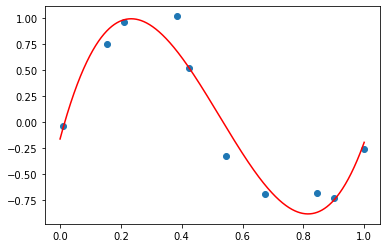

In [4]:
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)

features_curve = np.ones_like(x_curve)
print(features_curve.size)
#print(features_curve)
for i in range(1, M+1):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)
print(features_curve.size)
y_curve = model.predict(features_curve)
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_curve, 'r')
plt.show()

Now, we have got all the coefficients (noted as $\pmb{w}^*$) of the polynomial function by minimizing the error function (2). Therefore, we can evaluate the residual value of $E(\pmb{w}^*)$ given by (2) for the training and testing data. However, it is sometimes more convenient to use the *root-mean-square* (RMS) error defined by 
$$
E_{RMS} = \sqrt{2E(\pmb{w}^*)/N}
\tag{3}
$$
in which the division by $N$ allows us to compare different sizes of data sets on an equal footing, also with the same scale (and in the same units) as the target variable $y$. 

In order to evaluate the polynomial function we obtained, we do the following:
* Calculate and print the RMS error on training data based on equation (3),
* Calculate and print the RMS error on testing data based on equation (3),
* Get and print the coefficients of the trained function $\omega_0$ ~ $\omega_M$ using [`LinearRegression.coef_`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [5]:
#print(feature_matrix.size)
print(M)
prediction_train = model.predict(feature_matrix)
#print(prediction_train.size)
rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))

feature_matrix_test = np.ones_like(x_test)
for i in range(1, M+1):
    feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)
    
print(feature_matrix_test.shape)
prediction_test = model.predict(feature_matrix_test)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

print('rms error on training data: ', rms_train)
print('rms error on testing data: ', rms_test)
print('coefficients of the trained function: ', model.coef_)

3
(100, 4)
rms error on training data:  0.16066897173745506
rms error on testing data:  0.30943910311337297
coefficients of the trained function:  [[ -0.16311694  10.9380811  -30.08577056  19.11555865]]


### Part 2.2. Method based on Gradient Descent Algorithm
Once we get the closed-form solution, which is also the optimal solution, the next thing we are supposed to do is to re-solve the problem by gradient descent algorithm, because gradient descent matters a lot in practical applications since we cannot have a closed-form solution for most of the practical problems. Generally, the ingredients make up a gradient descent algorithm are:
* defining the learning rate to update our parameters,
* defining a loss function or objective function which you should minimize (here we use the error function based on equation (2)),
* calculating the gradients of parameters w.r.t. the loss,
* update parameters according to the learning rate and gradients to a direction that makes the loss smaller.

So, let's do this in that way.

In [6]:
# defining a learning rate, you could change it
learning_rate = 0.1

# initialize the parameters, here we simply assign each parameter to 1
# becuase M=3, so we totally have 4 parameters (w0, w1, w2, w3)
W = np.ones((M+1, 1))

# calculate the feature matrix as before, in order to compute the loss
feature_matrix = np.ones_like(x_train)
for i in range(1, 4):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)

# iteratively do gradient descent, here we just iterate it 50 times
for i in range(50000):
    # calculate the values of the polynomial function
    F = np.matmul(feature_matrix, W)

    # calculate the loss, print it every 10 iterations
    if i % 1000 ==0:
        loss = 0.5 * np.sum((F - y_train) ** 2)
        print('loss: ', loss)

    # calcualte the gradients of the parameters
    # here we have 10 data samples, so we calculate the mean.
    # please understand this formulation by inferencing the gradients
    # on your own with what you learnt in undergraduate school.
    G = np.mean((F - y_train) * feature_matrix, axis=0).reshape(-1, 1)

    # update parameters to a direction that makes the loss smaller
    # so we use '-' here, it is also why we call gradient "descent"
    W = W - learning_rate * G

loss:  34.380066478803926
loss:  1.0751767114959085
loss:  1.0475124025362361
loss:  1.021883947619665
loss:  0.9971925704761718
loss:  0.9732241407549563
loss:  0.9499247088760696
loss:  0.9272696720611538
loss:  0.9052401370409436
loss:  0.8838186403760648
loss:  0.8629883646367932
loss:  0.8427329861595515
loss:  0.8230366371472653
loss:  0.8038838887048746
loss:  0.7852597379345854
loss:  0.7671495960358269
loss:  0.749539276850753
loss:  0.7324149857470267
loss:  0.7157633088112434
loss:  0.6995712023413029
loss:  0.6838259826288963
loss:  0.6685153160240169
loss:  0.6536272092736847
loss:  0.6391500001273055
loss:  0.6250723482013264
loss:  0.6113832260960091
loss:  0.5980719107573698
loss:  0.5851279750775314
loss:  0.5725412797268872
loss:  0.5603019652116996
loss:  0.5484004441508895
loss:  0.5368273937659889
loss:  0.5255737485783607
loss:  0.514630693307964
loss:  0.5039896559681191
loss:  0.4936423011508295
loss:  0.48358052349744673
loss:  0.4737964413495187
loss:  0.46428

Again, we show the original training data points and the draw the curve of the function obtained on a single figure. 

(10000, 1)
[[  0.26302601]
 [  5.09378364]
 [-15.37240253]
 [  9.54447903]]
range(0, 4)
10000


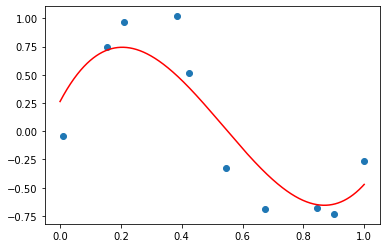

In [7]:
M=3
# your code here
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
print(x_curve.shape)
#print(features_curve.size)
#print(features_curve)
print(W)
print(range(0,M+1))

def our_model(x):
    sum=0
    for i in range(0,M+1):
        
        t = W[i]* x ** i 
       
        sum += t
    return sum

y_predict= []
for x_in in x_curve:
    y=our_model(x_in)
    y_predict.append(y)
y_predict= np.array(y_predict)
print(y_predict.size)

plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_predict, 'r')
plt.show()

(10000, 4)


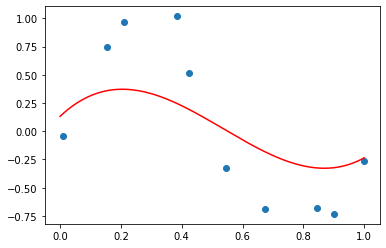

In [8]:
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)

for i in range(1, M+1):
    features_curve = np.concatenate((features_curve,x_curve ** i), axis=1)
print(features_curve.shape)

y_model = np.matmul(features_curve, W)/2

    
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_model, 'r')
plt.show()

--------------------<span style="color:red">2 points</span>--------------------<br>
Also, in order to evaluate the polynomial function we obtained, we do the following:
* Calculate and print the RMS error on training data based on equation (3),
* Calculate and print the RMS error on testing data based on equation (3),
* Print the coefficients (parameters).

In [9]:
# your code here

prediction_train = np.matmul(feature_matrix, W)
rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))

print(feature_matrix_test.shape)
prediction_test = np.matmul(feature_matrix_test,W)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

print('rms error on training data: ', rms_train )
print('rms error on testing data: ', rms_test )
print('coefficients of the trained function: ', W )

(100, 4)
rms error on training data:  0.27153580258450954
rms error on testing data:  0.35655784276240604
coefficients of the trained function:  [[  0.26302601]
 [  5.09378364]
 [-15.37240253]
 [  9.54447903]]


--------------------<span style="color:red">3 points</span>--------------------<br>

#### Question 1. What's the difference between closed-form method and gradient descent method?  

#### Your answer:

The closed-method form should be preffered for "smaller"datasets. For very large datasets and datasets where the inverse of x^T x may not exist, the gradienst descent method will be preferred. The linear function is defined as :

\begin{align}
f(x, \pmb{w}) = \omega_0 + \omega_1x + \omega_2x^2 + ... + \omega_Mx^M = \sum_{j=0}^{M}\omega_jx^j,
\tag{1}
\end{align}

where Y is the response variable, x is an m-dimensional sample vector, and w is the weight vector. Using the closed-form solution, we compute the wights of the model as follows: 
\begin{align}
w=((X^TX)^-1)*X^T y
\tag{1}
\end{align}

Gradient Desecent(GD)

Using the Gradient Descent optimization algorithm, the weights are updataed incrementally after each epoch. 
Essentially, we can picture GD optimization as a hiker who want to climb down a mountaing in to a valley, and each setp is determined by the steepness of the slope and the leg length of the hiker. 

--------------------<span style="color:red">3.5 points</span>--------------------<br>

### Part 2.3. Model selection with closed-form solution
There remains the problem of choosing the order $M$ of the polynomial, this is actually an example of the concept *model selection*. To see how changing $M$ affects the regression problem being solved, please change $M=$ from 1 to 9, and get the following objectives based on **closed-form analysis**:
* Draw all the 9 figures as done above (make sure the function curve and training data points are in the same figure for each case, using plt.subplots),
* Calculate all the error values using equation (3) with respect to trainig and testing data for all the 9 cases, and plot this values on a single figure (that means 18 points would be drawn in the figure, with x axis representing $M$ and y axis representing the error value, please use two colors to distinguish training and testing),
* Print the coefficients for the 9 polynomial functions. 


 Results when M = 1
rms error on training / testing data: 0.478388 / 0.484966
coefficients of the trained function:  [[ 0.79454616 -1.44141789]]

 Results when M = 2
rms error on training / testing data: 0.461018 / 0.493981
coefficients of the trained function:  [[ 0.55537648  0.06117962 -1.45333078]]

 Results when M = 3
rms error on training / testing data: 0.160669 / 0.309439
coefficients of the trained function:  [[ -0.16311694  10.9380811  -30.08577056  19.11555865]]

 Results when M = 4
rms error on training / testing data: 0.159394 / 0.310507
coefficients of the trained function:  [[ -0.18940812  11.75740862 -34.07877995  25.43571362  -3.14449788]]

 Results when M = 5
rms error on training / testing data: 0.112024 / 0.298416
coefficients of the trained function:  [[-7.92998629e-02  3.70865622e+00  3.12971770e+01 -1.56475755e+02
   2.02270285e+02 -8.10183758e+01]]

 Results when M = 6
rms error on training / testing data: 0.071934 / 0.342196
coefficients of the trained function

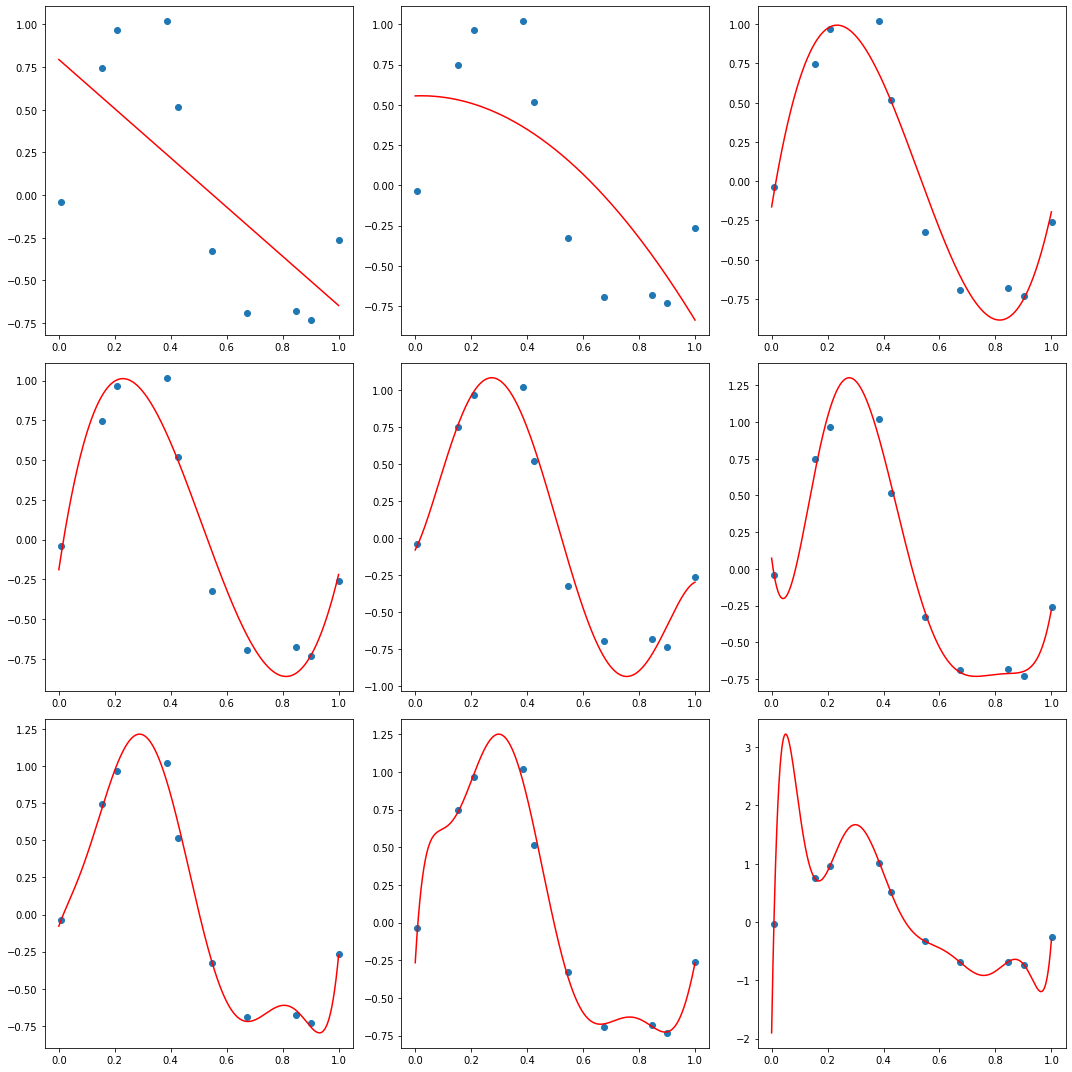

[0.484966360074247, 0.4939805456219969, 0.30943910311337297, 0.3105069243042859, 0.2984159850451733, 0.34219582780845126, 0.34211205633896363, 0.3432828832843074, 0.7850593422530033]


Text(0.5, 1.0, 'RMS of test and train')

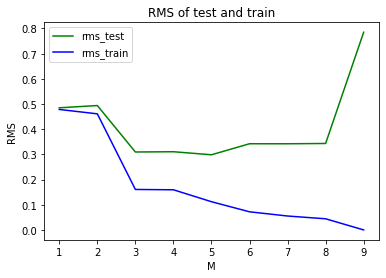

In [10]:
# your code here
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
set_rms_test= []
set_rms_train= []
for M in range(1, 10):
    # do something here
    feature_matrix = np.ones_like(x_train)
    for i in range(1, M+1):
        feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)
    
    from sklearn.linear_model import LinearRegression
    model = LinearRegression(fit_intercept=False).fit(feature_matrix, y_train)
    
    x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
    features_curve = np.ones_like(x_curve)
    
    for i in range(1, M+1):
        features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

    y_curve = model.predict(features_curve)
    x=(M-1)//3
    y=(M-1)%3
   
    ax[x,y].plot(x_train, y_train, marker='o', linestyle='None') 
    ax[x,y].plot(x_curve, y_curve, 'r')
    
    prediction_train = model.predict(feature_matrix)
    rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))
    
    feature_matrix_test = np.ones_like(x_test)
    
    for i in range(1, M+1):
        feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)
    
    prediction_test = model.predict(feature_matrix_test)
    rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))
    

    set_rms_test.append(rms_test)
    set_rms_train.append(rms_train)
    
    print('\n Results when M = %d' % M)
    print('rms error on training / testing data: %f / %f' % (rms_train, rms_test))
    print('coefficients of the trained function: ', model.coef_)

fig.tight_layout()
plt.show()

print(set_rms_test)
M_x = np.linspace(1, 9, 9)
# draw the 18 points here

plt.plot(M_x, set_rms_test, 'g', label ='rms_test') 
plt.plot(M_x, set_rms_train, 'b', label ='rms_train') 
plt.legend(loc='upper left')

plt.xlabel('M')
plt.ylabel('RMS')
plt.title('RMS of test and train')

--------------------<span style="color:red">5.5 points</span>--------------------<br>

In fact, when $M = 9$, the 10 training points would be exactly fitted, and the training loss becomes zero, since the degree of freedom for this regression problem is 10. However, the fitted curve oscillates wildly and gives a very poor representation of the function $sin(2\pi x)$. This behavior is known as **over-fitting**. 
#### Question 2. Which M is the best one for this probelm and why? Why the over-fitting happens when $M$ is big?

#### Your answer:


when M=5, the rms of testing data is most smallest. Therefore, M=5 is the best one. 

Over-fitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. So if M it too big, our model fit too much to the training data. In the result we can't predict well the testing data with that model anymore.

This means that the noise or random flucatuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize 

--------------------<span style="color:red">6.5 points</span>--------------------<br>

### Part 2.4. Gradient descent practice
Set $M=9$, based on **gradient descent algorithm**, do the following (During training, print the loss every $n$ iterations to show you are running the gradient descent algorithm to train the model, you could select a $n$ as you like):
* Change learning rate and see how fast the training converges,
* Change number of iteration to see whether the training loss would be smaller,
* Draw the figure as done above when you feel the training is good enough (make sure the function curve and training data points are in the same figure),
* Calculate and print the error values using equation (3) with respect to trainig and testing data,
* Print the coefficients (parameters) for the polynomial function. 

loss: 31.205706322941207
loss: 0.507829385576683
loss: 0.4321523713598537
loss: 0.37355930184047315
loss: 0.32499993959902895
loss: 0.28469152877312404
loss: 0.2512306938511671
loss: 0.2234539428413881
loss: 0.20039549879125998
loss: 0.18125367967727404
loss: 0.1653630166614153
loss: 0.15217111020222437
loss: 0.14121941853576586
loss: 0.13212731037147785
loss: 0.12457882718245561
loss: 0.11831169470501329
loss: 0.11310820148606446
loss: 0.10878762724964734
loss: 0.10519995775398243
loss: 0.10222066755242781
loss: 0.09974638921158835
loss: 0.09769131836930967
loss: 0.0959842296065597
loss: 0.09456599935026384
loss: 0.09338754965785821
loss: 0.09240814137185459
loss: 0.09159395728322717
loss: 0.09091692602843797
loss: 0.09035374581723428
loss: 0.08988507403811717
loss: 0.0894948545573381
loss: 0.08916975931600735
loss: 0.08889872480502249
loss: 0.08867256729719464
loss: 0.08848366345498071
loss: 0.08832568520593218
loss: 0.08819337966523826
loss: 0.08808238645148304
loss: 0.0879890860421

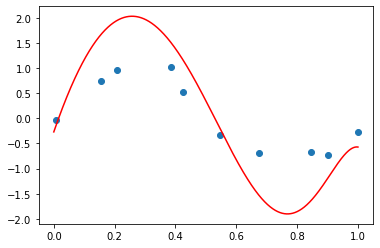

(100, 10)
rms error on training data:  0.6640512343657586
rms error on testing data:  0.8083561945638607
coefficients of the trained function:  [[ -0.26912661]
 [ 17.63774229]
 [-31.4391543 ]
 [-12.22136352]
 [  7.68629281]
 [ 15.60541744]
 [ 13.67823949]
 [  6.15975297]
 [ -3.6570375 ]
 [-13.75144155]]


In [11]:
# your code here
# defining a learning rate

learning_rate = 0.1
# initialize the parameters
M=9
W =np.ones((M+1,1))

# calculate the feature matrix as before, in order to compute the loss
feature_matrix = np.ones_like(x_train)
for i in range (1,M+1):
    feature_matrix =np.concatenate((feature_matrix, x_train ** i), axis=1)
# iteratively do gradient descent
iterations = 500000
for i in range(iterations):
    # calculate the values of the polynomial function
    F = np.matmul(feature_matrix, W)/2

    # calculate the loss and print it
    if i % 10000 ==0:
        loss = 0.5 * np.sum((F-y_train) ** 2)
        print('loss:', loss)
    # calcualte the gradients of the parameters
    G = np.mean((F - y_train) * feature_matrix, axis=0).reshape(-1, 1)

    # update parameters to a direction that makes the loss smaller
    W = W - learning_rate * G 
    
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)

for i in range(1, M+1):
    features_curve = np.concatenate((features_curve,x_curve ** i), axis=1)

y_model = np.matmul(features_curve, W)

    
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_model, 'r')
plt.show()

prediction_train = np.matmul(feature_matrix, W)
rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))

print(feature_matrix_test.shape)
prediction_test = np.matmul(feature_matrix_test,W)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

print('rms error on training data: ', rms_train )
print('rms error on testing data: ', rms_test )
print('coefficients of the trained function: ', W )

--------------------<span style="color:red">7.5 points</span>--------------------<br>

#### Question 3. Actually, when using gradient descent algorithm, even in the case that $M=9$, it is hard to observe the over-fitting phenomenon. It is because it's difficult to reach the theoretically optimal solution that makes the training loss zero. Regardless of over-fitting, please give your idea to make the training loss smaller when using gradient descent algorithm in this case.

#### Your answer:

We could use Adaptive learning rates. It is reducing the learning rate by some factor every few epochs. At the beginning, we are far away form the destination, we could use a larger learning rate. After several eopchs, we should use small learning rate since we are close to the destination.

--------------------<span style="color:red">8 points</span>--------------------<br>

## Part 3. Linear regression with polynomials with regularization
Before introducing regularization, let's think about a way to solve the over-fitting problem. <br>
Definitely, through the experiments done above, you somewhat have found that the most direct way is reducing $M$. However, what if we use more training data? 

### Part 3.1. Re-visit polynomial regression with extra training data and $M=9$
Finish this step as in Part 2.1 based on closed-form analysis. (*note*: please calculate the RMS error on the original training and testing data)

10000


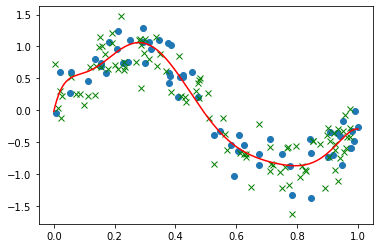

(100, 10)
rms new error on training data:  0.2288644498963814
rms new error on testing data:  0.2946262714850062
coefficients of the trained function:  [[-1.83865513e-02  2.07504406e+01 -3.11916156e+02  2.43682755e+03
  -9.77774964e+03  2.15345964e+04 -2.71503685e+04  1.93217142e+04
  -7.04728868e+03  9.73155968e+02]]


In [12]:
with open('data/extradata.pickle', 'rb') as f:
    extra_data = pickle.load(f)
    
x_extra = extra_data['x_extra']
y_extra = extra_data['y_extra']

x_extra_train = np.concatenate((x_train, x_extra), axis=0)
y_extra_train = np.concatenate((y_train, y_extra), axis=0)

# your code here
M = 9
feature_matrix = np.ones_like(x_extra_train)

for i in range(1, M+1):
    feature_matrix = np.concatenate((feature_matrix, x_extra_train ** i), axis=1)


from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False).fit(feature_matrix, y_extra_train)

x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)

features_curve = np.ones_like(x_curve)
print(features_curve.size)
#print(features_curve)
for i in range(1, M+1):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

y_curve = model.predict(features_curve)

plt.plot(x_extra_train , y_extra_train , marker='o', linestyle='None') 
plt.plot(x_test , y_test , 'g',marker='x', linestyle='None') 


plt.plot(x_curve, y_curve, 'r')
plt.show()

prediction_train = model.predict(feature_matrix)
#print(prediction_train.size)
rms_train_new = np.sqrt(np.sum((prediction_train - y_extra_train) ** 2) / len(prediction_train))

feature_matrix_test = np.ones_like(x_test)
for i in range(1, M+1):
    feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)
    
print(feature_matrix_test.shape)
prediction_test = model.predict(feature_matrix_test)
rms_test_new = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

print('rms new error on training data: ', rms_train_new)
print('rms new error on testing data: ', rms_test_new)
print('coefficients of the trained function: ', model.coef_)

--------------------<span style="color:red">9 points</span>--------------------<br>

#### Question 4. Does introducing more training data in this case alleviate over-fitting? Why? 

#### Your answer:


Adding more training data, adds diversity. It decreases the generalization error because your model becomes more general by virtue of being trained on more examples.

--------------------<span style="color:red">10 points</span>--------------------<br>

### Part 3.2. Re-visit polynomial regression with regularization and $M=9$
We may alleviate the over-fitting problem through introducing more training data, but what if there is no extra training data? In fact, we donnot want to limit the number of parameters in a model according to the size of the available training set, because it also limits the capacity and flexibility of the model. One technique that is often used to control over the over-fitting phenomenon in such cases is that of **regularization**, which involves adding a penalty term to the error function (2) in order to discourage the coefficients from reaching large values. The simplest such penalty term takes the form of a sum of squares of all of the coefficients, leading to a modified error function:
$$
\widetilde{E}(\pmb{w})=\frac{1}{2}\sum_{i=1}^{N}\{f(x_i, \pmb{w}) - y_i\}^2 + \frac{\lambda}{2}||\pmb{w}||^2
\tag{4}
$$
where $||\pmb{w}||^2\equiv \pmb{w}^T\pmb{w} = \omega_0^2 + \omega_1^2 + ... + \omega_M^2$, and the coefficient $\lambda$ governs the relative importance of the regularization term compared with the sum-of-squares error term. 

Again, this error function can be minimized exactly in closed form. The regression with such a quadratic regularizer is called *ridge regression*. In the context of neural networks, this approcah is known as **weight decay**. 

Apart from training and testing data, we also need another data set to test how suitable the $\lambda$ is before we use the model on the testing data. We call this data set **validation** set. Usually, when we have large amount of training data, we create a validation set splitted from the original training data and use the rest of the training data as the new training data. In our case, we only have the training data consisting of 10 data points, so here we use the extra data on Part 3.1 as the validation data. 

Please solve the ridge regression problem with the polynomial function using **training** data in the following 7 conditions:
* $M=9$, $ln\lambda=-35$ ($\lambda=e^{-35}$)
* $M=9$, $ln\lambda=-25$
* $M=9$, $ln\lambda=-20$
* $M=9$, $ln\lambda=-15$
* $M=9$, $ln\lambda=-10$
* $M=9$, $ln\lambda=-5$
* $M=9$, $ln\lambda=0$

with the following tasks:
1. Calculate the root-mean-square error based on (3) (not the modified one) on the **training** and **validation** set. Plot the curves of RMS error versus $\ln\lambda$ for training and validation set in a single figure (i.e., in this figure, two curves will be plotted, one for training data and one for validation data. x axis represents the value of $\ln\lambda$ and y axis represents RMS error). 
2. Print the coefficients for the obtained 7 ploynomial functions.
3. Find the best value for $\lambda$ among these conditions (`best` means its corresponding RMS on the **validation** set is the smallest), calculate the corresponding RMS error on **testing** data and print it.
4. Draw the curve of the polynomial function in a figure w.r.t the best $\lambda$, in which the 10 original training data points and the 100 testing data points should also be plotted using different colors. 

To sovle the ridge regression problem, we could use [`sklearn.linear_model.Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).

(50, 10) (60, 1)

 Results when M = 9, ln_lamda = -35
rms:  2.6456175738717747
coefficients of the trained function:  [[ 0.         -1.02452069 -1.26161224 -1.3173158  -1.31289464 -1.28542881
  -1.2488452  -1.20905051 -1.16874517 -1.12921084]]

 Results when M = 9, ln_lamda = -25
rms:  0.8662250694287054
coefficients of the trained function:  [[ 0.         -0.28445345 -0.38909555 -0.44051533 -0.46520491 -0.47476709
  -0.47548197 -0.47096495 -0.46336209 -0.45397582]]

 Results when M = 9, ln_lamda = -20
rms:  0.7084048150547381
coefficients of the trained function:  [[ 0.         -0.15923096 -0.25257674 -0.31327055 -0.35001017 -0.37053675
  -0.38052629 -0.38375504 -0.38265872 -0.37880195]]

 Results when M = 9, ln_lamda = -15
rms:  0.6554616020771284
coefficients of the trained function:  [[ 0.         -0.04862785 -0.14426112 -0.2238955  -0.27885514 -0.31403768
  -0.33534561 -0.34728615 -0.35295834 -0.35443193]]

 Results when M = 9, ln_lamda = -10
rms:  0.6612590386871215
coefficients 

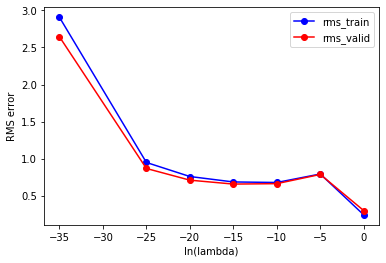

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
[2.6456175738717747, 0.8662250694287054, 0.7084048150547381, 0.6554616020771284, 0.6612590386871215, 0.7857110898201523, 0.2969051906321991]


In [13]:
# your code here (task 1 & 2)

feature_matrix = np.ones_like(x_train)
for i in range(1, 10):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)
    
feature_matrix_valid = np.ones_like(x_extra)
for i in range(1, 10):
    feature_matrix_valid = np.concatenate((feature_matrix_valid, x_extra ** i), axis=1)
    
from sklearn.linear_model import Ridge

rmss_train = []
rmss_valid = []
best_model = None
best_valid = np.finfo(float).max

print(feature_matrix_valid.shape,y_extra_train.shape )

ln_lambdas = [-35, -25, -20, -15, -10, -5, 0]
for ln_lambda in ln_lambdas:
    model = Ridge(alpha=ln_lambda, fit_intercept=True).fit(feature_matrix_valid,y_extra)

    prediction_train = model.predict(feature_matrix_valid)
    rms_train = np.sqrt(np.sum((prediction_train - y_extra) ** 2) / len(prediction_train))

    prediction_valid =  model.predict(feature_matrix_test)
    rms_valid = np.sqrt(np.sum((prediction_valid - y_test) ** 2) / len(prediction_valid))
    
    rmss_train.append(rms_train)
    rmss_valid.append(rms_valid)
    
    print('\n Results when M = %d, ln_lamda = %d' % (M,  ln_lambda) )
    print('rms: ',rms_valid)
    print('coefficients of the trained function: ', model.coef_)
   
    
    if rms_valid < best_valid:
        best_valid = rms_valid
        best_model = model

plt.plot(ln_lambdas, rmss_train, 'b', marker='o',label = 'rms_train' )
plt.plot(ln_lambdas, rmss_valid, 'r', marker='o', label = 'rms_valid')
plt.legend(loc='upper right')
plt.xlabel('ln(lambda)')
plt.ylabel('RMS error')
plt.show()
print(best_model)
print(rmss_valid)

--------------------<span style="color:red">12 points</span>--------------------<br>

rms error on testing data:  0.2969051906321991


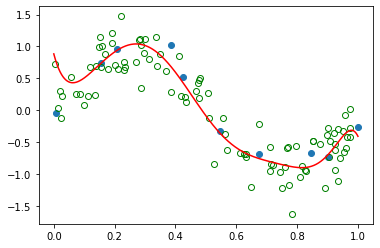

In [14]:
# (task 3) select the best model, print the rms error on testing data

feature_matrix_test = np.ones_like(x_test)
for i in range(1, 10):
    feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)
    
prediction_test = best_model.predict(feature_matrix_test)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

print('rms error on testing data: ', rms_test)
 
# (task 4) drawing
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)


for i in range(1, 10):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

y_curve = best_model.predict(features_curve)
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_test, y_test, fillstyle='none', marker='o', color='g', linestyle='None')
plt.plot(x_curve, y_curve, 'r')
plt.show()

--------------------<span style="color:red">12.5 points</span>--------------------<br>

#### Question 5. Does regularization alleviate over-fitting? Why? 

#### Your answer:


The larger your parameters become, the higher the chance your model overfits the data. So we should minimize the cost fuction but also restict the parameters not to become too large. 

Regularization is the process of regularizing the parameters that constrain, regulaize the coefficient estimates towards zero.  

The regularization term penalizes large parmeters. So each time some parameter is updated to become significantly large, it will increase the value of the cost function by the regularization term, and as a result, it will be penalized and updated to a small value. 

--------------------<span style="color:red">13.5 points</span>--------------------<br>

In [15]:
import math
math.exp(-10)

W =np.ones((M+1,1))
print(W.T.shape, W.shape)

np.sum(W**2)


(1, 10) (10, 1)


10.0

### Part 3.3. Gradient descent practice
Choose a $\lambda$ as you like and set $M=9$, calculate and print its rms error on training, validation and testing data respectively, draw the function curve with all the training and testing data on it, based on **gradient descent algorithm**.

***Note***: the loss function is equation (4), when calculating the gradients, remember to also consider the regularizatin component.

loss:  613.9256590796965
loss:  3.2758001171695432
loss:  2.901261246576554
loss:  2.623288324125226
loss:  2.414944523572079
[[ 4.94338905e-05]
 [-4.98038725e-04]
 [ 8.74153485e-04]
 [ 2.87292646e-04]
 [-3.29826228e-04]
 [-5.66036413e-04]
 [-4.74496736e-04]
 [-1.80047708e-04]
 [ 2.17274228e-04]
 [ 6.52824307e-04]]


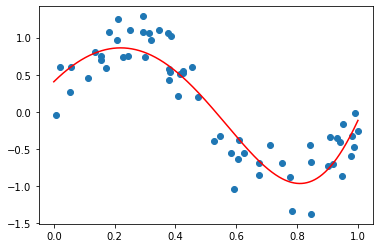

In [18]:
# your code here
# defining a learning rate
import math

M = 9
learning_rate = 0.1
lmda = math.exp(-10)

# initialize the parameters

W =np.ones((M+1,1))

# calculate the feature matrix as before, in order to compute the loss
feature_matrix_extra = np.ones_like(x_extra_train)
for i in range (1,M+1):
    feature_matrix_extra =np.concatenate((feature_matrix_extra, x_extra_train ** i), axis=1)

# iteratively do gradient descent
for i in range(50000):
    # calculate the values of the polynomial function
    F = np.matmul(feature_matrix_extra, W) 

    # calculate the loss and print
    if i % 10000 ==0:
        loss = 0.5 * np.sum((F - y_extra_train) ** 2) + lmda*np.sum(W**2)*0.5
        print('loss: ', loss)
    # calcualte the gradients of the parameters, considering regularization
    G = np.mean((F - y_extra_train) * feature_matrix_extra, axis=0).reshape(-1, 1)+lmda*W

    # update parameters to a direction that makes the loss smaller
    W = W - learning_rate * G 

# draw the figure and print all the information
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)

for i in range(1, M+1):
    features_curve = np.concatenate((features_curve,x_curve ** i), axis=1)

y_model = np.matmul(features_curve, W)

    
plt.plot(x_extra_train, y_extra_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_model, 'r')
plt.show()


--------------------<span style="color:red">15 points</span>--------------------<br>